<B/> <span style="font-family:Calibri; font-size:2em;"><font color="Blue"/> Problem Statement

<span style="font-family:Courier New; font-size:1.3em;">Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

<span style="font-family:Courier New; font-size:1.3em;">A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

<span style="font-family:Courier New; font-size:1.3em;">Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

<span style="font-family:Courier New; font-size:1.3em;">Explanation of data fields available in Data Dictionary, 'Credit Default Data Dictionary.xlsx'

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Import All Liabraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Import the Dataset

In [2]:
Default = pd.read_csv('Company data.csv')

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Database view

In [3]:
Default.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Details of the columns of the dataset

In [4]:
Default.columns

Index(['Num', 'Networth Next Year', 'Total assets', 'Net worth',
       'Total income', 'Change in stock', 'Total expenses', 'Profit after tax',
       'PBDITA', 'PBT', 'Cash profit', 'PBDITA as % of total income',
       'PBT as % of total income', 'PAT as % of total income',
       'Cash profit as % of total income', 'PAT as % of net worth', 'Sales',
       'Income from financial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Deposits (accepted by commercial banks)',
       'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to cur

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Amendment of column headings

In [5]:
Default.columns = Default.columns.str.replace('as % of', 'to')

In [6]:
Default.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


In [7]:
Default.columns

Index(['Num', 'Networth Next Year', 'Total assets', 'Net worth',
       'Total income', 'Change in stock', 'Total expenses', 'Profit after tax',
       'PBDITA', 'PBT', 'Cash profit', 'PBDITA to total income',
       'PBT to total income', 'PAT to total income',
       'Cash profit to total income', 'PAT to net worth', 'Sales',
       'Income from financial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Deposits (accepted by commercial banks)',
       'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to current liabilities (times)'

In [8]:
Default.columns = Default.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc')

In [9]:
Default.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_to_total_income',
       'PBT_to_total_income', 'PAT_to_total_income',
       'Cash_profit_to_total_income', 'PAT_to_net_worth', 'Sales',
       'Income_from_financial_services', 'Other_income', 'Total_capital',
       'Reserves_and_funds', 'Deposits_accepted_by_commercial_banks',
       'Borrowings', 'Current_liabilities_&_provisions',
       'Deferred_tax_liability', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL/TNW',
       'Total_term_liabilities_/_tangible_net_worth',
       'Contingent_liabilities_/_Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times',
       

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Heading of dataset

In [10]:
Default.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Shape of the dataset

In [11]:
Default.shape

(3541, 52)

In [12]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 3541 
The number of columns (variables) is 52


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Data Types

In [13]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          3541 non-null   int64  
 1   Networth_Next_Year                           3541 non-null   float64
 2   Total_assets                                 3541 non-null   float64
 3   Net_worth                                    3541 non-null   float64
 4   Total_income                                 3343 non-null   float64
 5   Change_in_stock                              3083 non-null   float64
 6   Total_expenses                               3402 non-null   float64
 7   Profit_after_tax                             3410 non-null   float64
 8   PBDITA                                       3410 non-null   float64
 9   PBT                                          3410 non-null   float64
 10  

In [14]:
Default.dtypes

Num                                              int64
Networth_Next_Year                             float64
Total_assets                                   float64
Net_worth                                      float64
Total_income                                   float64
Change_in_stock                                float64
Total_expenses                                 float64
Profit_after_tax                               float64
PBDITA                                         float64
PBT                                            float64
Cash_profit                                    float64
PBDITA_to_total_income                         float64
PBT_to_total_income                            float64
PAT_to_total_income                            float64
Cash_profit_to_total_income                    float64
PAT_to_net_worth                               float64
Sales                                          float64
Income_from_financial_services                 float64
Other_inco

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>EDA of dataset

In [15]:
Default.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,3541.000000,3541.000000,3.541000e+03,3541.000000,3.343000e+03,3083.000000,3.402000e+03,3410.00000,3410.000000,3410.000000,...,3213.000000,2801.000000,2901.000000,3180.000000,2.849000e+03,2849.000000,3541.000000,3541.000000,3.541000e+03,1347.000000
mean,1772.451567,1616.256199,3.443382e+03,1295.862214,4.582823e+03,41.489264,4.262931e+03,277.36044,578.056305,383.810088,...,17.041261,87.078725,27.930469,19.088399,2.206739e+07,-1333.698175,-220.316436,-221.512285,3.443382e+03,63.905687
std,1023.731393,17459.639673,3.097089e+04,13387.891867,5.568124e+04,440.573761,5.302869e+04,3064.40606,5653.770427,4117.069953,...,83.943754,598.545835,151.042868,376.340737,1.655193e+08,37500.729972,14261.946209,14261.923760,3.097089e+04,1433.809532
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.30000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,886.000000,31.700000,9.130000e+01,31.300000,1.064500e+02,-1.800000,9.582500e+01,0.50000,6.900000,0.700000,...,3.760000,8.200000,5.100000,2.990000,1.316250e+06,10.000000,0.000000,0.000000,9.130000e+01,3.275000
50%,1773.000000,116.300000,3.097000e+02,102.300000,4.449000e+02,1.600000,4.077000e+02,8.80000,35.400000,12.400000,...,6.320000,17.270000,9.760000,6.400000,4.672063e+06,10.000000,1.430000,1.180000,3.097000e+02,9.100000
75%,2658.000000,456.100000,1.098700e+03,377.300000,1.440900e+03,18.050000,1.359775e+03,52.27500,150.250000,71.975000,...,11.680000,40.350000,20.240000,11.845000,1.065197e+07,10.000000,9.620000,7.480000,1.098700e+03,17.790000
max,3545.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.10000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


In [16]:
for column in Default[['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_to_total_income',
       'PBT_to_total_income', 'PAT_to_total_income',
       'Cash_profit_to_total_income', 'PAT_to_net_worth', 'Sales',
       'Income_from_financial_services', 'Other_income', 'Total_capital',
       'Reserves_and_funds', 'Deposits_accepted_by_commercial_banks',
       'Borrowings', 'Current_liabilities_&_provisions',
       'Deferred_tax_liability', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL/TNW',
       'Total_term_liabilities_/_tangible_net_worth',
       'Contingent_liabilities_/_Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'WIP_turnover',
       'Raw_material_turnover', 'Shares_outstanding', 'Equity_face_value',
       'EPS', 'Adjusted_EPS', 'Total_liabilities', 'PE_on_BSE']]:
    print(column.upper(),': ',Default[column].nunique())
    print(Default[column].value_counts().sort_values())
    print('\n')

NUM :  3541
2047    1
1995    1
2039    1
2035    1
2031    1
       ..
16      1
2061    1
12      1
2081    1
2049    1
Name: Num, Length: 3541, dtype: int64


NETWORTH_NEXT_YEAR :  2574
 748.2     1
-1.9       1
 60.5      1
 1647.8    1
 107.0     1
          ..
 2.8       8
-0.2       9
 11.9      9
 4.5       9
 0.0       9
Name: Networth_Next_Year, Length: 2574, dtype: int64


TOTAL_ASSETS :  2961
1257.6    1
3534.1    1
2219.0    1
128.1     1
584.4     1
         ..
0.5       5
4.1       5
2.3       7
0.1       7
9.5       7
Name: Total_assets, Length: 2961, dtype: int64


NET_WORTH :  2376
268.5      1
1219.0     1
604.0      1
340.0      1
233.5      1
          ..
0.3       10
2.0       10
0.5       10
3.9       12
0.1       19
Name: Net_worth, Length: 2376, dtype: int64


TOTAL_INCOME :  2870
3351.6     1
283.0      1
1637.0     1
238.5      1
1308.0     1
          ..
0.5        8
0.7        8
17.6       9
0.2       10
0.1       23
Name: Total_income, Length: 2870, dtype:

DEBT_TO_EQUITY_RATIO_TIMES :  642
6.04       1
10.50      1
14.96      1
5.89       1
8.09       1
        ... 
0.33      28
0.05      31
0.02      39
0.01      63
0.00     396
Name: Debt_to_equity_ratio_times, Length: 642, dtype: int64


CASH_TO_CURRENT_LIABILITIES_TIMES :  249
5.24      1
1.08      1
3.70      1
1.29      1
1.96      1
       ... 
0.04    217
0.03    237
0.00    263
0.01    307
0.02    319
Name: Cash_to_current_liabilities_times, Length: 249, dtype: int64


CASH_TO_AVERAGE_COST_OF_SALES_PER_DAY :  2051
42.78       1
10.64       1
21.15       1
95.85       1
13.18       1
         ... 
1.43        7
4.87        7
2.34        7
365.00      9
0.00      162
Name: Cash_to_average_cost_of_sales_per_day, Length: 2051, dtype: int64


CREDITORS_TURNOVER :  1608
3.61         1
23.76        1
0.02         1
1009.92      1
49.68        1
          ... 
5.10         8
4.20         8
3.71         9
4.00        11
0.00       178
Name: Creditors_turnover, Length: 1608, dtype: int64


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Check the duplicates

In [17]:
dups = Default.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Missing Values

In [18]:
Default.isna().sum()

Num                                               0
Networth_Next_Year                                0
Total_assets                                      0
Net_worth                                         0
Total_income                                    198
Change_in_stock                                 458
Total_expenses                                  139
Profit_after_tax                                131
PBDITA                                          131
PBT                                             131
Cash_profit                                     131
PBDITA_to_total_income                           68
PBT_to_total_income                              68
PAT_to_total_income                              68
Cash_profit_to_total_income                      68
PAT_to_net_worth                                  0
Sales                                           259
Income_from_financial_services                  935
Other_income                                   1295
Total_capita

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Any missing values

In [19]:
Default.isnull().values.any() 

True

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Total number of missing values

In [20]:
Default.isnull().sum().sum()

18533

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Missing Value Treatment

In [21]:
#dropping 'Deposits_accepted_by_commercial_banks' as its completely(100%) blank
col=list(Default.drop(['Deposits_accepted_by_commercial_banks'], axis=1))

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

Default = pd.DataFrame(imputer.fit_transform(Default))
Default.columns=col
Default.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1.0,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2.0,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3.0,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,6.40,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4.0,2.7,2.7,2.7,444.9,1.6,407.7,8.8,35.4,12.4,...,0.00,17.27,9.76,0.00,52404.0,10.0,0.00,0.00,2.7,9.10
4,5.0,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,9.10


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Transforming Target variable 'Networth_Next_Year' into 1 & 0

In [22]:
Default['default'] = np.where((Default['Networth_Next_Year'] > 0), 0, 1)

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking top 15 rows

In [23]:
Default[['default','Networth_Next_Year']].head(15)

,default,Networth_Next_Year
0,0,8890.6
1,0,394.3
2,0,92.2
3,0,2.7
4,0,109.0
5,0,688.6
6,0,246.0
7,0,13.7
8,0,291.5
9,1,-7.3


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Default proportions

In [24]:
Default['default'].value_counts()

0    3298
1     243
Name: default, dtype: int64

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking proportion of default

In [25]:
243/(3298+243)

0.06862468229313753

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Description of Default target variable

In [26]:
Default['default'].describe()

count    3541.000000
mean        0.068625
std         0.252851
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking the target variable with PBT_to_total_income

In [27]:
Default['PBT_to_total_income'].describe()

count     3541.000000
mean       -16.883635
std        421.337332
min     -21340.000000
25%          0.600000
50%          3.310000
75%          8.630000
max        100.000000
Name: PBT_to_total_income, dtype: float64

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking the statistical summary of non-defaulters

In [28]:
Default.loc[Default['default'] == 0,'PBT_to_total_income'].describe()

count    3298.000000
mean       -3.855588
std       196.861553
min     -9700.000000
25%         0.982500
50%         3.580000
75%         9.172500
max       100.000000
Name: PBT_to_total_income, dtype: float64

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking the statistical summary of defaulters

In [29]:
Default.loc[Default['default'] == 1,'PBT_to_total_income'].describe()

count      243.000000
mean      -193.700494
std       1426.590111
min     -21340.000000
25%        -31.705000
50%         -5.090000
75%          0.000000
max         92.380000
Name: PBT_to_total_income, dtype: float64

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Outliers

<AxesSubplot:>

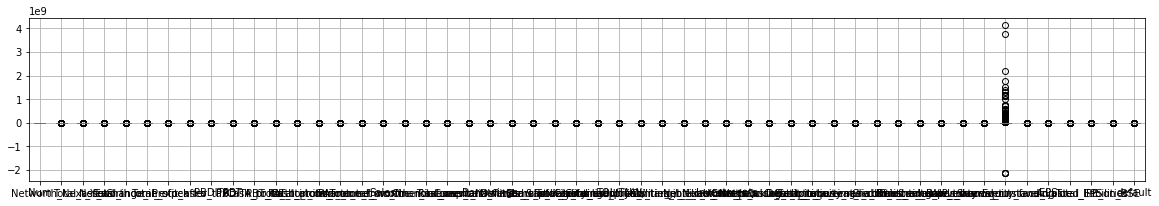

In [30]:
Default.boxplot(figsize=(20,3))

Text(0.5, 1.0, 'Total_income Boxplot')

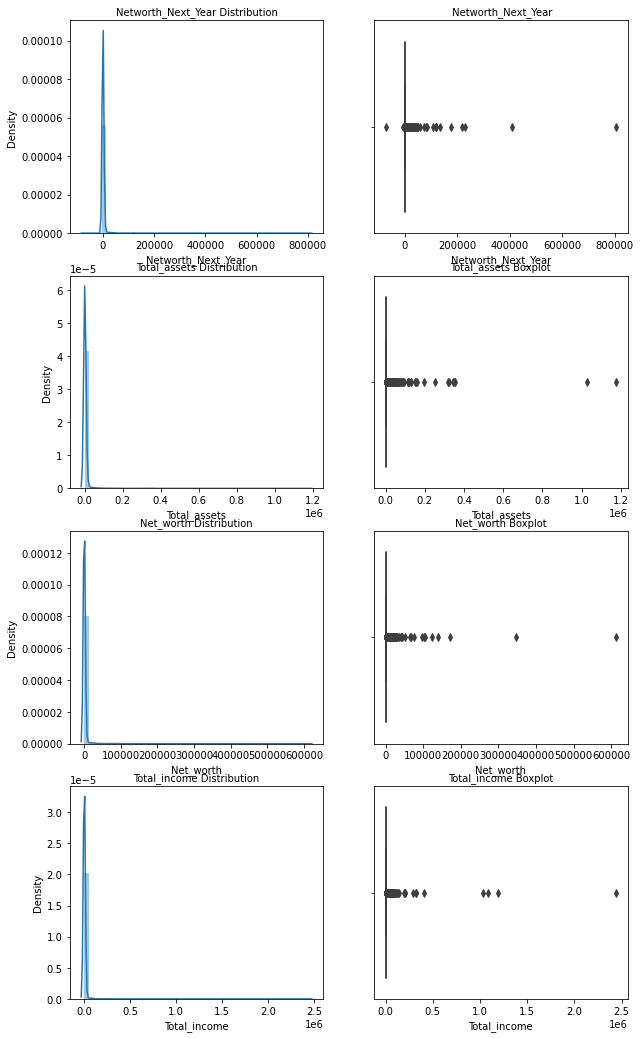

In [31]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['Networth_Next_Year'] , ax=axes[0][0])
a.set_title("Networth_Next_Year Distribution",fontsize=10)

a = sns.boxplot(Default['Networth_Next_Year'] , orient = "v" , ax=axes[0][1])
a.set_title(" Networth_Next_Year",fontsize=10)

a = sns.distplot(Default['Total_assets'] , ax=axes[1][0])
a.set_title("Total_assets Distribution",fontsize=10)

a = sns.boxplot(Default['Total_assets'] , orient = "v" , ax=axes[1][1])
a.set_title("Total_assets Boxplot",fontsize=10)


a = sns.distplot(Default['Net_worth'] , ax=axes[2][0])
a.set_title("Net_worth Distribution",fontsize=10)

a = sns.boxplot(Default['Net_worth'] , orient = "v" , ax=axes[2][1])
a.set_title("Net_worth Boxplot",fontsize=10)


a = sns.distplot(Default['Total_income'] , ax=axes[3][0])
a.set_title("Total_income Distribution",fontsize=10)

a = sns.boxplot(Default['Total_income'] , orient = "v" , ax=axes[3][1])
a.set_title("Total_income Boxplot",fontsize=10)


Text(0.5, 1.0, 'PBDITA Boxplot')

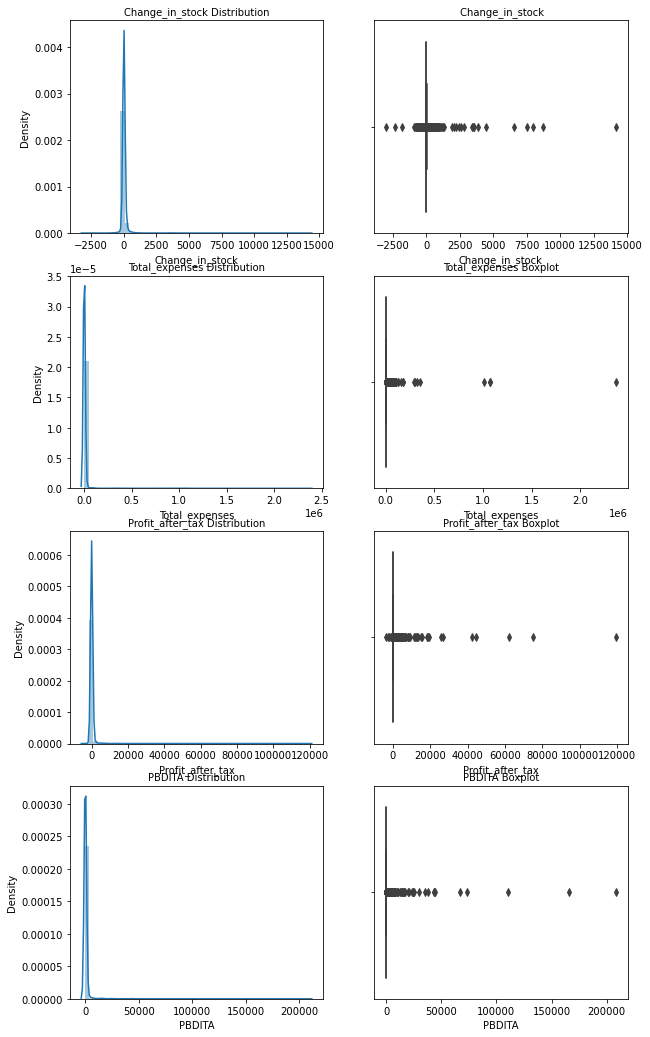

In [32]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['Change_in_stock'] , ax=axes[0][0])
a.set_title("Change_in_stock Distribution",fontsize=10)

a = sns.boxplot(Default['Change_in_stock'] , orient = "v" , ax=axes[0][1])
a.set_title(" Change_in_stock",fontsize=10)

a = sns.distplot(Default['Total_expenses'] , ax=axes[1][0])
a.set_title("Total_expenses Distribution",fontsize=10)

a = sns.boxplot(Default['Total_expenses'] , orient = "v" , ax=axes[1][1])
a.set_title("Total_expenses Boxplot",fontsize=10)


a = sns.distplot(Default['Profit_after_tax'] , ax=axes[2][0])
a.set_title("Profit_after_tax Distribution",fontsize=10)

a = sns.boxplot(Default['Profit_after_tax'] , orient = "v" , ax=axes[2][1])
a.set_title("Profit_after_tax Boxplot",fontsize=10)


a = sns.distplot(Default['PBDITA'] , ax=axes[3][0])
a.set_title("PBDITA Distribution",fontsize=10)

a = sns.boxplot(Default['PBDITA'] , orient = "v" , ax=axes[3][1])
a.set_title("PBDITA Boxplot",fontsize=10)

Text(0.5, 1.0, 'PBT_to_total_income Boxplot')

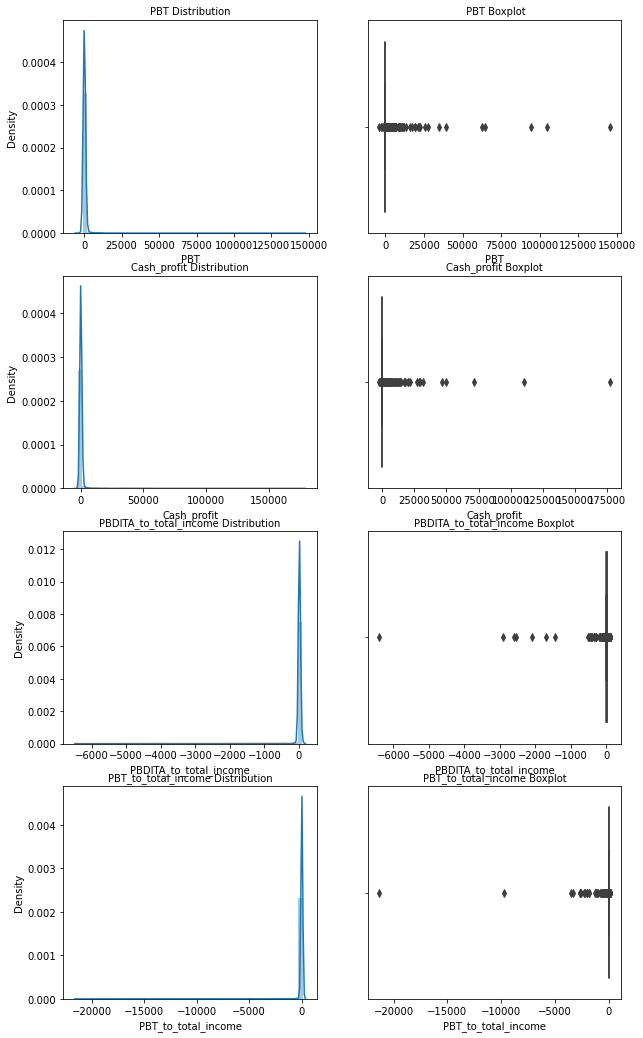

In [33]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['PBT'] , ax=axes[0][0])
a.set_title("PBT Distribution",fontsize=10)

a = sns.boxplot(Default['PBT'] , orient = "v" , ax=axes[0][1])
a.set_title(" PBT Boxplot",fontsize=10)

a = sns.distplot(Default['Cash_profit'] , ax=axes[1][0])
a.set_title("Cash_profit Distribution",fontsize=10)

a = sns.boxplot(Default['Cash_profit'] , orient = "v" , ax=axes[1][1])
a.set_title("Cash_profit Boxplot",fontsize=10)


a = sns.distplot(Default['PBDITA_to_total_income'] , ax=axes[2][0])
a.set_title("PBDITA_to_total_income Distribution",fontsize=10)

a = sns.boxplot(Default['PBDITA_to_total_income'] , orient = "v" , ax=axes[2][1])
a.set_title("PBDITA_to_total_income Boxplot",fontsize=10)


a = sns.distplot(Default['PBT_to_total_income'] , ax=axes[3][0])
a.set_title("PBT_to_total_income Distribution",fontsize=10)

a = sns.boxplot(Default['PBT_to_total_income'] , orient = "v" , ax=axes[3][1])
a.set_title("PBT_to_total_income Boxplot",fontsize=10)

Text(0.5, 1.0, 'Sales Boxplot')

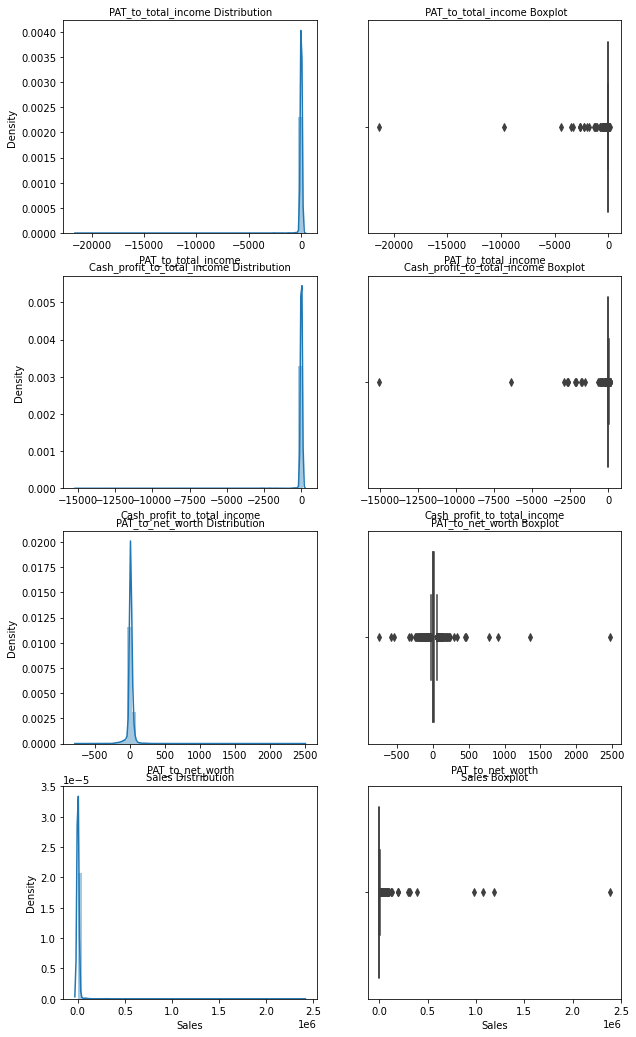

In [34]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['PAT_to_total_income'] , ax=axes[0][0])
a.set_title("PAT_to_total_income Distribution",fontsize=10)

a = sns.boxplot(Default['PAT_to_total_income'] , orient = "v" , ax=axes[0][1])
a.set_title(" PAT_to_total_income Boxplot",fontsize=10)

a = sns.distplot(Default['Cash_profit_to_total_income'] , ax=axes[1][0])
a.set_title("Cash_profit_to_total_income Distribution",fontsize=10)

a = sns.boxplot(Default['Cash_profit_to_total_income'] , orient = "v" , ax=axes[1][1])
a.set_title("Cash_profit_to_total_income Boxplot",fontsize=10)


a = sns.distplot(Default['PAT_to_net_worth'] , ax=axes[2][0])
a.set_title("PAT_to_net_worth Distribution",fontsize=10)

a = sns.boxplot(Default['PAT_to_net_worth'] , orient = "v" , ax=axes[2][1])
a.set_title("PAT_to_net_worth Boxplot",fontsize=10)


a = sns.distplot(Default['Sales'] , ax=axes[3][0])
a.set_title("Sales Distribution",fontsize=10)

a = sns.boxplot(Default['Sales'] , orient = "v" , ax=axes[3][1])
a.set_title("Sales Boxplot",fontsize=10)

Text(0.5, 1.0, 'Reserves_and_funds Boxplot')

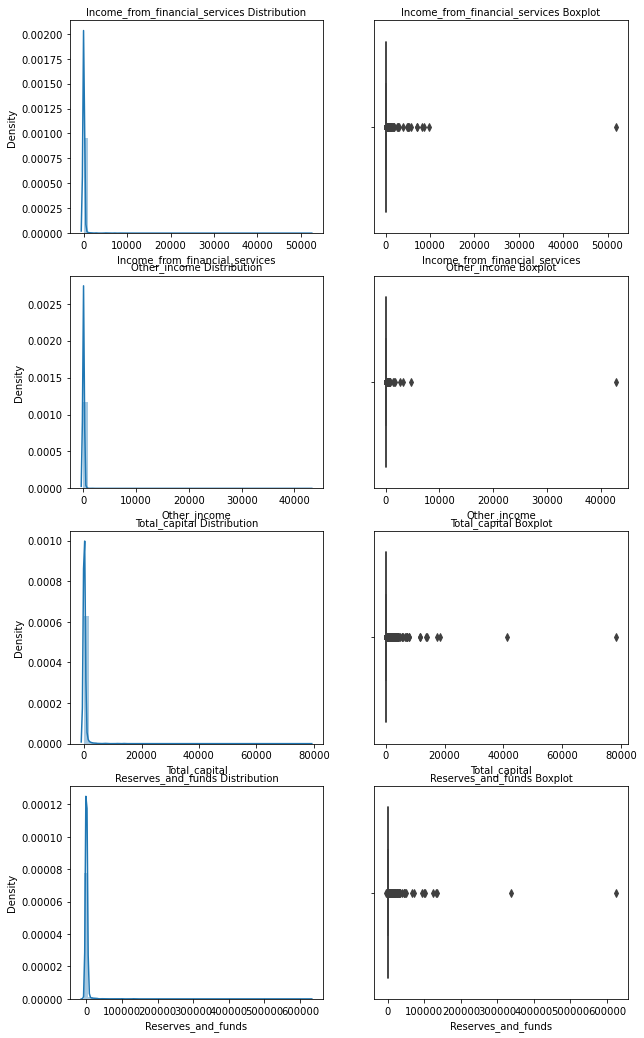

In [35]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['Income_from_financial_services'] , ax=axes[0][0])
a.set_title("Income_from_financial_services Distribution",fontsize=10)

a = sns.boxplot(Default['Income_from_financial_services'] , orient = "v" , ax=axes[0][1])
a.set_title("Income_from_financial_services Boxplot",fontsize=10)

a = sns.distplot(Default['Other_income'] , ax=axes[1][0])
a.set_title("Other_income Distribution",fontsize=10)

a = sns.boxplot(Default['Other_income'] , orient = "v" , ax=axes[1][1])
a.set_title("Other_income Boxplot",fontsize=10)


a = sns.distplot(Default['Total_capital'] , ax=axes[2][0])
a.set_title("Total_capital Distribution",fontsize=10)

a = sns.boxplot(Default['Total_capital'] , orient = "v" , ax=axes[2][1])
a.set_title("Total_capital Boxplot",fontsize=10)


a = sns.distplot(Default['Reserves_and_funds'] , ax=axes[3][0])
a.set_title("Reserves_and_funds Distribution",fontsize=10)

a = sns.boxplot(Default['Reserves_and_funds'] , orient = "v" , ax=axes[3][1])
a.set_title("Reserves_and_funds Boxplot",fontsize=10)

Text(0.5, 1.0, 'Shareholders_funds Boxplot')

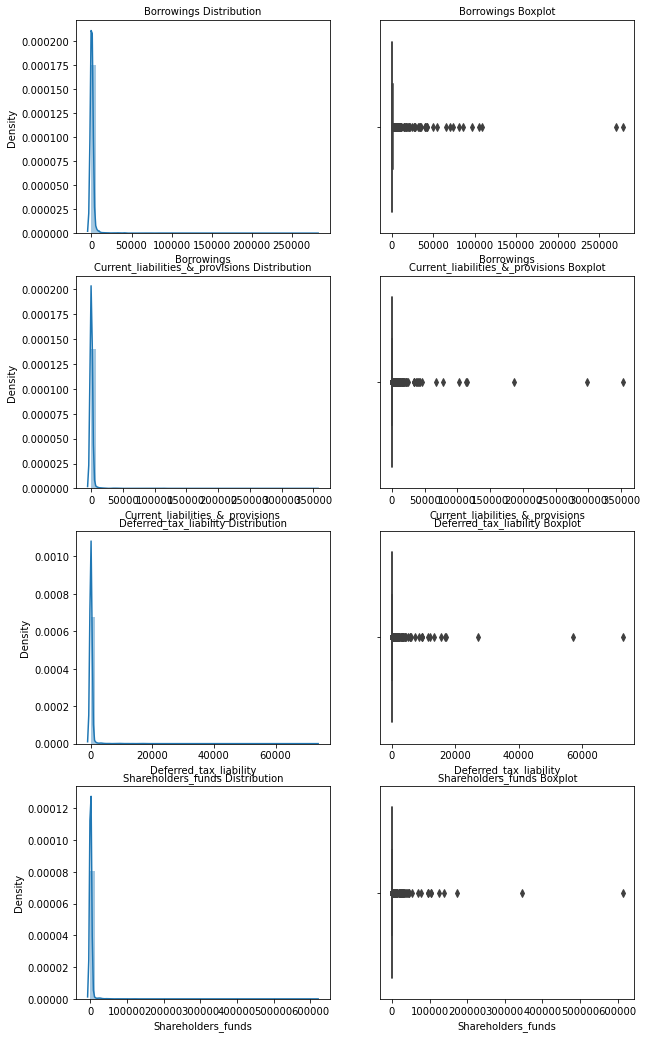

In [36]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['Borrowings'] , ax=axes[0][0])
a.set_title("Borrowings Distribution",fontsize=10)

a = sns.boxplot(Default['Borrowings'] , orient = "v" , ax=axes[0][1])
a.set_title("Borrowings Boxplot",fontsize=10)

a = sns.distplot(Default['Current_liabilities_&_provisions'] , ax=axes[1][0])
a.set_title("Current_liabilities_&_provisions Distribution",fontsize=10)

a = sns.boxplot(Default['Current_liabilities_&_provisions'] , orient = "v" , ax=axes[1][1])
a.set_title("Current_liabilities_&_provisions Boxplot",fontsize=10)


a = sns.distplot(Default['Deferred_tax_liability'] , ax=axes[2][0])
a.set_title("Deferred_tax_liability Distribution",fontsize=10)

a = sns.boxplot(Default['Deferred_tax_liability'] , orient = "v" , ax=axes[2][1])
a.set_title("Deferred_tax_liability Boxplot",fontsize=10)


a = sns.distplot(Default['Shareholders_funds'] , ax=axes[3][0])
a.set_title("Shareholders_funds Distribution",fontsize=10)

a = sns.boxplot(Default['Shareholders_funds'] , orient = "v" , ax=axes[3][1])
a.set_title("Shareholders_funds Boxplot",fontsize=10)

Text(0.5, 1.0, 'Total_term_liabilities_/_tangible_net_worth Boxplot')

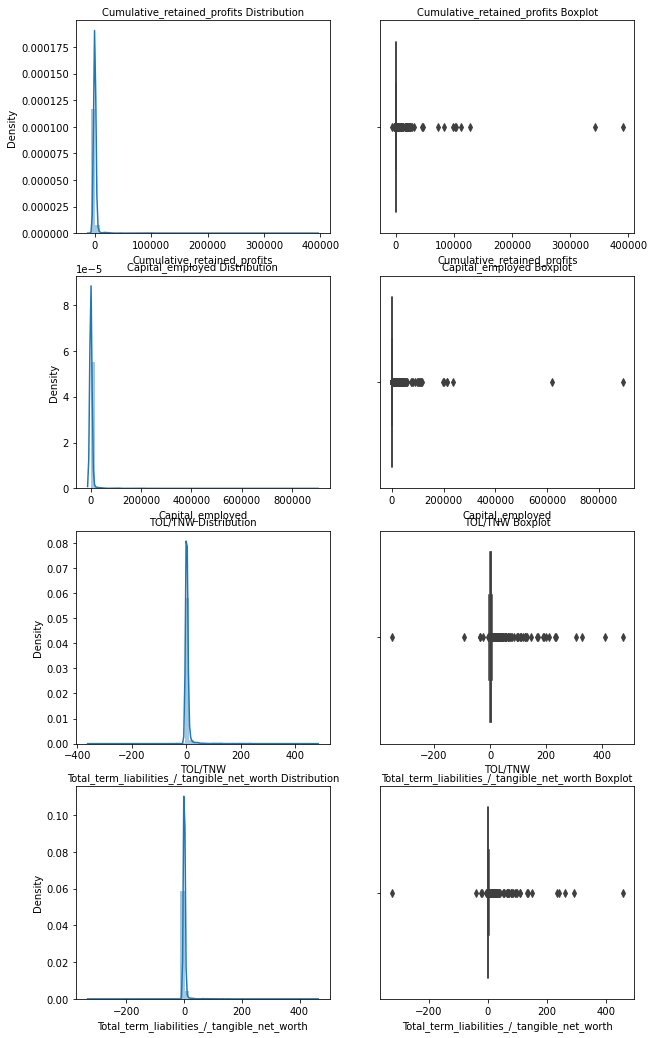

In [37]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['Cumulative_retained_profits'] , ax=axes[0][0])
a.set_title("Cumulative_retained_profits Distribution",fontsize=10)

a = sns.boxplot(Default['Cumulative_retained_profits'] , orient = "v" , ax=axes[0][1])
a.set_title("Cumulative_retained_profits Boxplot",fontsize=10)

a = sns.distplot(Default['Capital_employed'] , ax=axes[1][0])
a.set_title("Capital_employed Distribution",fontsize=10)

a = sns.boxplot(Default['Capital_employed'] , orient = "v" , ax=axes[1][1])
a.set_title("Capital_employed Boxplot",fontsize=10)


a = sns.distplot(Default['TOL/TNW'] , ax=axes[2][0])
a.set_title("TOL/TNW Distribution",fontsize=10)

a = sns.boxplot(Default['TOL/TNW'] , orient = "v" , ax=axes[2][1])
a.set_title("TOL/TNW Boxplot",fontsize=10)


a = sns.distplot(Default['Total_term_liabilities_/_tangible_net_worth'] , ax=axes[3][0])
a.set_title("Total_term_liabilities_/_tangible_net_worth Distribution",fontsize=10)

a = sns.boxplot(Default['Total_term_liabilities_/_tangible_net_worth'] , orient = "v" , ax=axes[3][1])
a.set_title("Total_term_liabilities_/_tangible_net_worth Boxplot",fontsize=10)

Text(0.5, 1.0, 'Investments Boxplot')

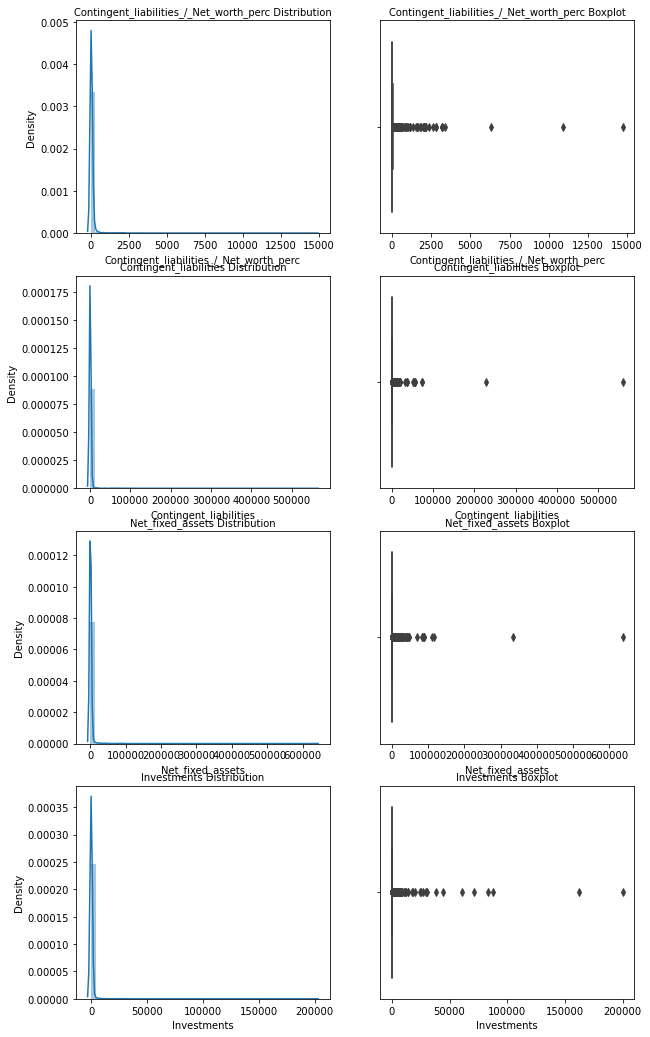

In [38]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['Contingent_liabilities_/_Net_worth_perc'] , ax=axes[0][0])
a.set_title("Contingent_liabilities_/_Net_worth_perc Distribution",fontsize=10)

a = sns.boxplot(Default['Contingent_liabilities_/_Net_worth_perc'] , orient = "v" , ax=axes[0][1])
a.set_title("Contingent_liabilities_/_Net_worth_perc Boxplot",fontsize=10)

a = sns.distplot(Default['Contingent_liabilities'] , ax=axes[1][0])
a.set_title("Contingent_liabilities Distribution",fontsize=10)

a = sns.boxplot(Default['Contingent_liabilities'] , orient = "v" , ax=axes[1][1])
a.set_title("Contingent_liabilities Boxplot",fontsize=10)


a = sns.distplot(Default['Net_fixed_assets'] , ax=axes[2][0])
a.set_title("Net_fixed_assets Distribution",fontsize=10)

a = sns.boxplot(Default['Net_fixed_assets'] , orient = "v" , ax=axes[2][1])
a.set_title("Net_fixed_assets Boxplot",fontsize=10)


a = sns.distplot(Default['Investments'] , ax=axes[3][0])
a.set_title("Investments Distribution",fontsize=10)

a = sns.boxplot(Default['Investments'] , orient = "v" , ax=axes[3][1])
a.set_title("Investments Boxplot",fontsize=10)

Text(0.5, 1.0, 'Current_ratio_times Boxplot')

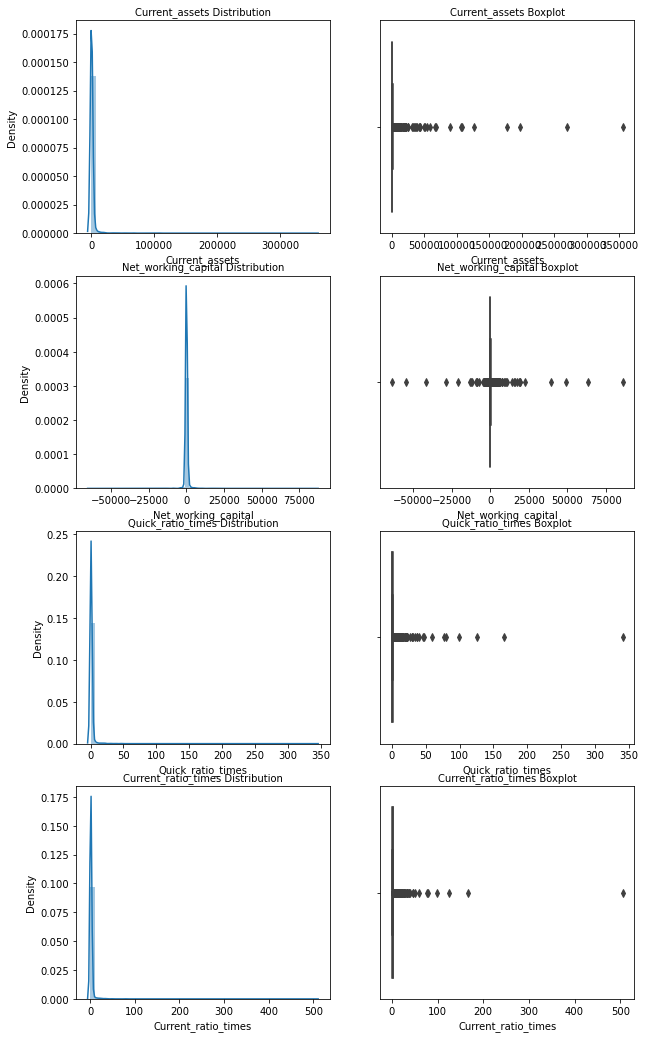

In [39]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['Current_assets'] , ax=axes[0][0])
a.set_title("Current_assets Distribution",fontsize=10)

a = sns.boxplot(Default['Current_assets'] , orient = "v" , ax=axes[0][1])
a.set_title("Current_assets Boxplot",fontsize=10)

a = sns.distplot(Default['Net_working_capital'] , ax=axes[1][0])
a.set_title("Net_working_capital Distribution",fontsize=10)

a = sns.boxplot(Default['Net_working_capital'] , orient = "v" , ax=axes[1][1])
a.set_title("Net_working_capital Boxplot",fontsize=10)


a = sns.distplot(Default['Quick_ratio_times'] , ax=axes[2][0])
a.set_title("Quick_ratio_times Distribution",fontsize=10)

a = sns.boxplot(Default['Quick_ratio_times'] , orient = "v" , ax=axes[2][1])
a.set_title("Quick_ratio_times Boxplot",fontsize=10)


a = sns.distplot(Default['Current_ratio_times'] , ax=axes[3][0])
a.set_title("Current_ratio_times Distribution",fontsize=10)

a = sns.boxplot(Default['Current_ratio_times'] , orient = "v" , ax=axes[3][1])
a.set_title("Current_ratio_times Boxplot",fontsize=10)

Text(0.5, 1.0, 'Current_ratio_times Boxplot')

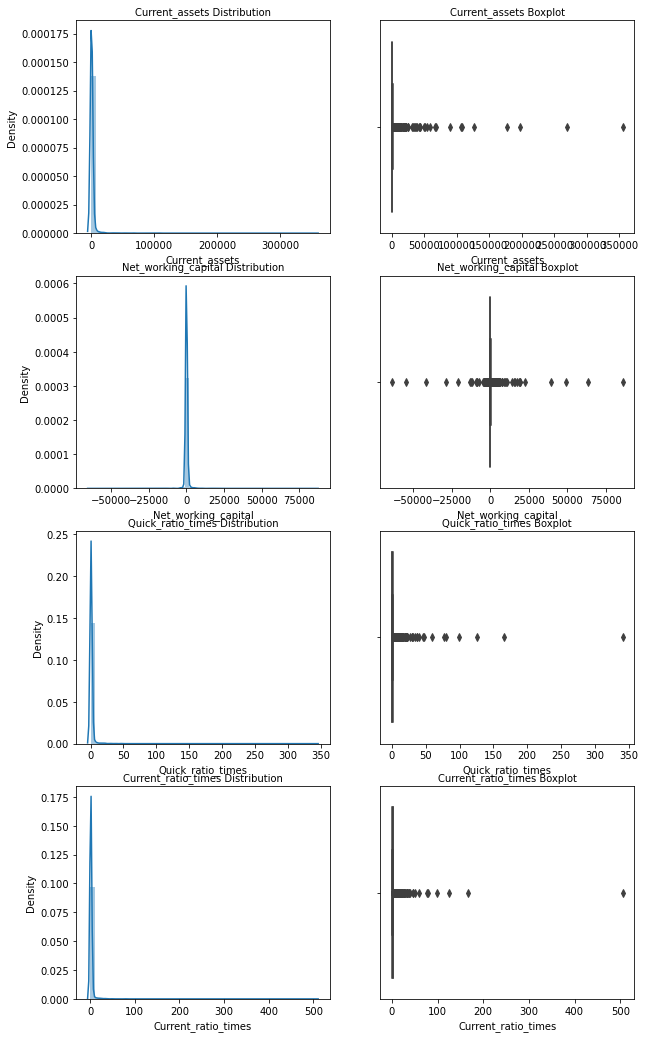

In [40]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['Current_assets'] , ax=axes[0][0])
a.set_title("Current_assets Distribution",fontsize=10)

a = sns.boxplot(Default['Current_assets'] , orient = "v" , ax=axes[0][1])
a.set_title("Current_assets Boxplot",fontsize=10)

a = sns.distplot(Default['Net_working_capital'] , ax=axes[1][0])
a.set_title("Net_working_capital Distribution",fontsize=10)

a = sns.boxplot(Default['Net_working_capital'] , orient = "v" , ax=axes[1][1])
a.set_title("Net_working_capital Boxplot",fontsize=10)


a = sns.distplot(Default['Quick_ratio_times'] , ax=axes[2][0])
a.set_title("Quick_ratio_times Distribution",fontsize=10)

a = sns.boxplot(Default['Quick_ratio_times'] , orient = "v" , ax=axes[2][1])
a.set_title("Quick_ratio_times Boxplot",fontsize=10)


a = sns.distplot(Default['Current_ratio_times'] , ax=axes[3][0])
a.set_title("Current_ratio_times Distribution",fontsize=10)

a = sns.boxplot(Default['Current_ratio_times'] , orient = "v" , ax=axes[3][1])
a.set_title("Current_ratio_times Boxplot",fontsize=10)

Text(0.5, 1.0, 'Creditors_turnover Boxplot')

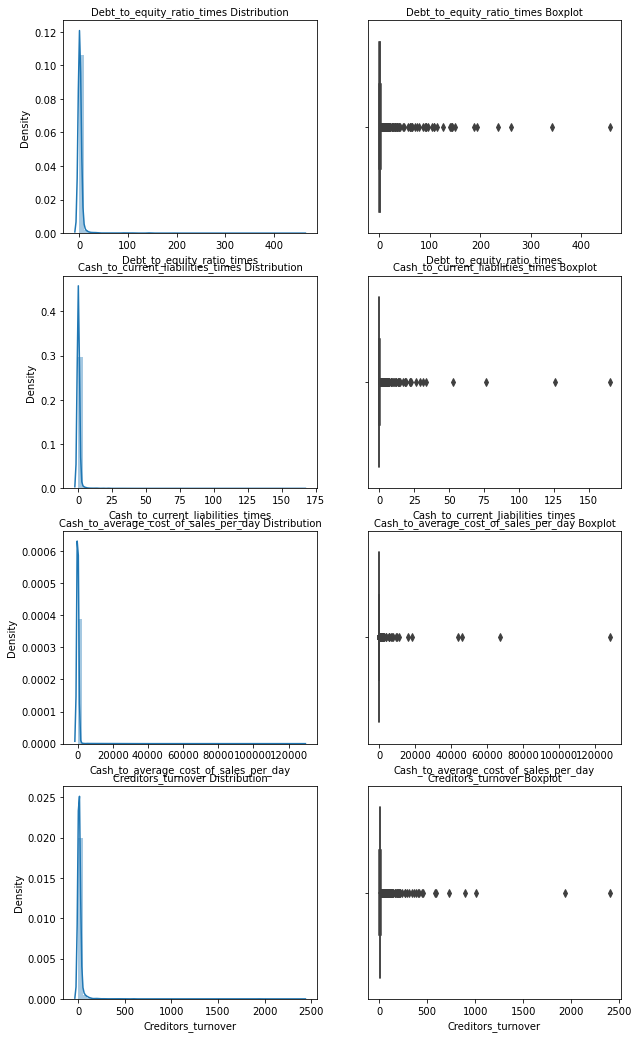

In [41]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['Debt_to_equity_ratio_times'] , ax=axes[0][0])
a.set_title("Debt_to_equity_ratio_times Distribution",fontsize=10)

a = sns.boxplot(Default['Debt_to_equity_ratio_times'] , orient = "v" , ax=axes[0][1])
a.set_title("Debt_to_equity_ratio_times Boxplot",fontsize=10)

a = sns.distplot(Default['Cash_to_current_liabilities_times'] , ax=axes[1][0])
a.set_title("Cash_to_current_liabilities_times Distribution",fontsize=10)

a = sns.boxplot(Default['Cash_to_current_liabilities_times'] , orient = "v" , ax=axes[1][1])
a.set_title("Cash_to_current_liabilities_times Boxplot",fontsize=10)


a = sns.distplot(Default['Cash_to_average_cost_of_sales_per_day'] , ax=axes[2][0])
a.set_title("Cash_to_average_cost_of_sales_per_day Distribution",fontsize=10)

a = sns.boxplot(Default['Cash_to_average_cost_of_sales_per_day'] , orient = "v" , ax=axes[2][1])
a.set_title("Cash_to_average_cost_of_sales_per_day Boxplot",fontsize=10)


a = sns.distplot(Default['Creditors_turnover'] , ax=axes[3][0])
a.set_title("Creditors_turnover Distribution",fontsize=10)

a = sns.boxplot(Default['Creditors_turnover'] , orient = "v" , ax=axes[3][1])
a.set_title("Creditors_turnover Boxplot",fontsize=10)

Text(0.5, 1.0, 'Raw_material_turnover Boxplot')

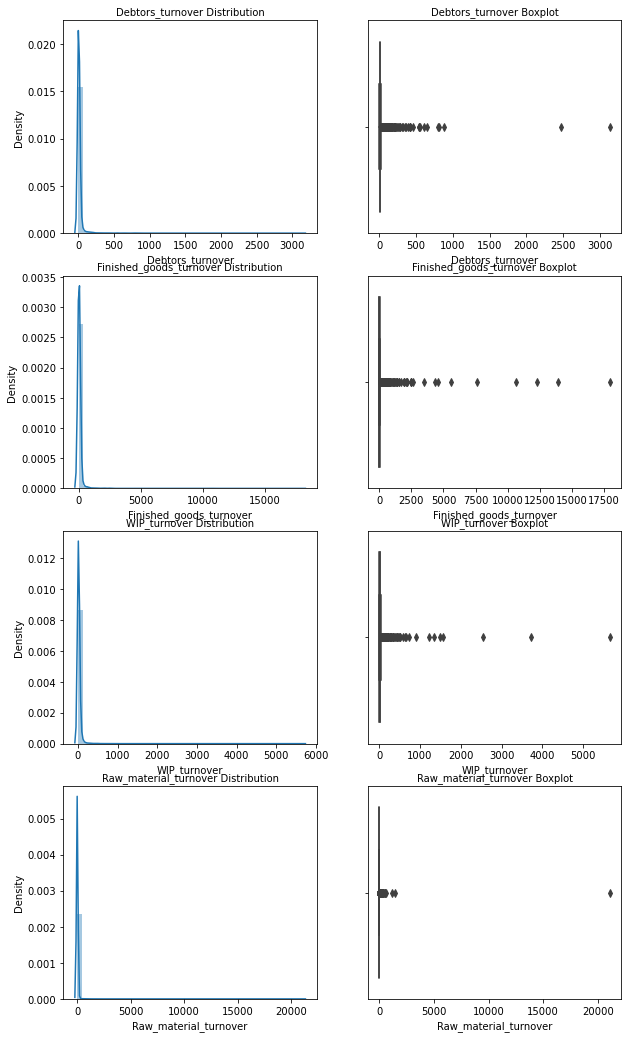

In [42]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['Debtors_turnover'] , ax=axes[0][0])
a.set_title("Debtors_turnover Distribution",fontsize=10)

a = sns.boxplot(Default['Debtors_turnover'] , orient = "v" , ax=axes[0][1])
a.set_title("Debtors_turnover Boxplot",fontsize=10)

a = sns.distplot(Default['Finished_goods_turnover'] , ax=axes[1][0])
a.set_title("Finished_goods_turnover Distribution",fontsize=10)

a = sns.boxplot(Default['Finished_goods_turnover'] , orient = "v" , ax=axes[1][1])
a.set_title("Finished_goods_turnover Boxplot",fontsize=10)


a = sns.distplot(Default['WIP_turnover'] , ax=axes[2][0])
a.set_title("WIP_turnover Distribution",fontsize=10)

a = sns.boxplot(Default['WIP_turnover'] , orient = "v" , ax=axes[2][1])
a.set_title("WIP_turnover Boxplot",fontsize=10)


a = sns.distplot(Default['Raw_material_turnover'] , ax=axes[3][0])
a.set_title("Raw_material_turnover Distribution",fontsize=10)

a = sns.boxplot(Default['Raw_material_turnover'] , orient = "v" , ax=axes[3][1])
a.set_title("Raw_material_turnover Boxplot",fontsize=10)

Text(0.5, 1.0, 'Adjusted_EPS Boxplot')

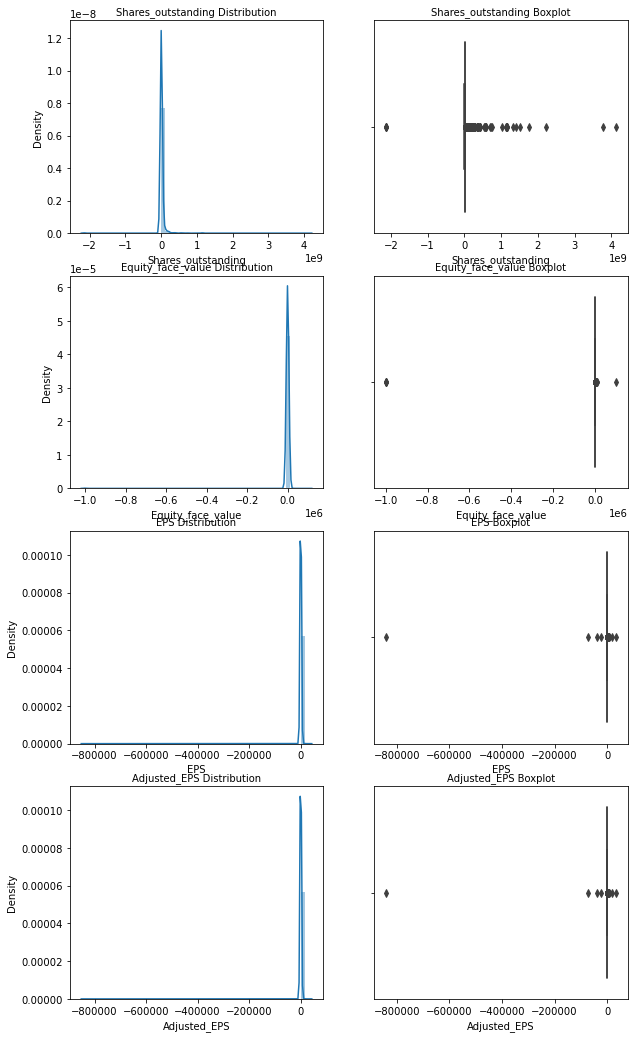

In [43]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['Shares_outstanding'] , ax=axes[0][0])
a.set_title("Shares_outstanding Distribution",fontsize=10)

a = sns.boxplot(Default['Shares_outstanding'] , orient = "v" , ax=axes[0][1])
a.set_title("Shares_outstanding Boxplot",fontsize=10)

a = sns.distplot(Default['Equity_face_value'] , ax=axes[1][0])
a.set_title("Equity_face_value Distribution",fontsize=10)

a = sns.boxplot(Default['Equity_face_value'] , orient = "v" , ax=axes[1][1])
a.set_title("Equity_face_value Boxplot",fontsize=10)


a = sns.distplot(Default['EPS'] , ax=axes[2][0])
a.set_title("EPS Distribution",fontsize=10)

a = sns.boxplot(Default['EPS'] , orient = "v" , ax=axes[2][1])
a.set_title("EPS Boxplot",fontsize=10)


a = sns.distplot(Default['Adjusted_EPS'] , ax=axes[3][0])
a.set_title("Adjusted_EPS Distribution",fontsize=10)

a = sns.boxplot(Default['Adjusted_EPS'] , orient = "v" , ax=axes[3][1])
a.set_title("Adjusted_EPS Boxplot",fontsize=10)

Text(0.5, 1.0, 'default Boxplot')

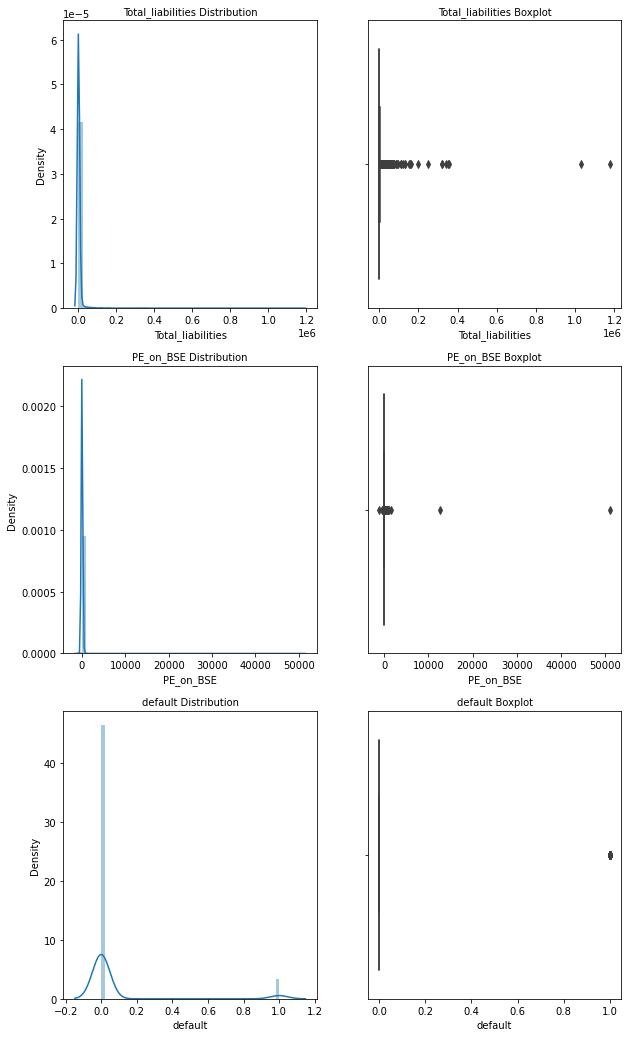

In [44]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(Default['Total_liabilities'] , ax=axes[0][0])
a.set_title("Total_liabilities Distribution",fontsize=10)

a = sns.boxplot(Default['Total_liabilities'] , orient = "v" , ax=axes[0][1])
a.set_title("Total_liabilities Boxplot",fontsize=10)

a = sns.distplot(Default['PE_on_BSE'] , ax=axes[1][0])
a.set_title("PE_on_BSE Distribution",fontsize=10)

a = sns.boxplot(Default['PE_on_BSE'] , orient = "v" , ax=axes[1][1])
a.set_title("PE_on_BSE Boxplot",fontsize=10)


a = sns.distplot(Default['default'] , ax=axes[2][0])
a.set_title("default Distribution",fontsize=10)

a = sns.boxplot(Default['default'] , orient = "v" , ax=axes[2][1])
a.set_title("default Boxplot",fontsize=10)

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Outlier Treatment

In [45]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [46]:
for column in Default.iloc[:, 2:4].columns:
    lr,ur=remove_outlier(Default[column])
    Default[column]=np.where(Default[column]>ur,ur,Default[column])
    Default[column]=np.where(Default[column]<lr,lr,Default[column])

<AxesSubplot:>

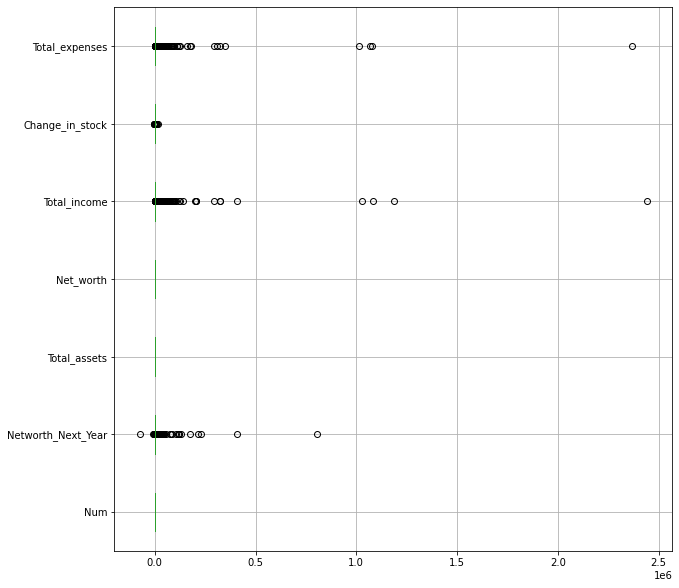

In [47]:
plt.figure(figsize=(10,10))
Default.iloc[:, 0:7].boxplot(vert=0)

<AxesSubplot:>

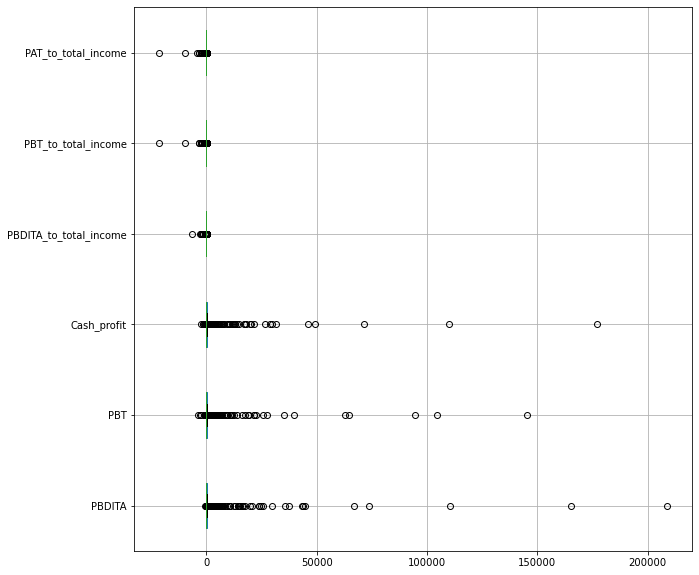

In [48]:
plt.figure(figsize=(10,10))
Default.iloc[:, 8:14].boxplot(vert=0)

<AxesSubplot:>

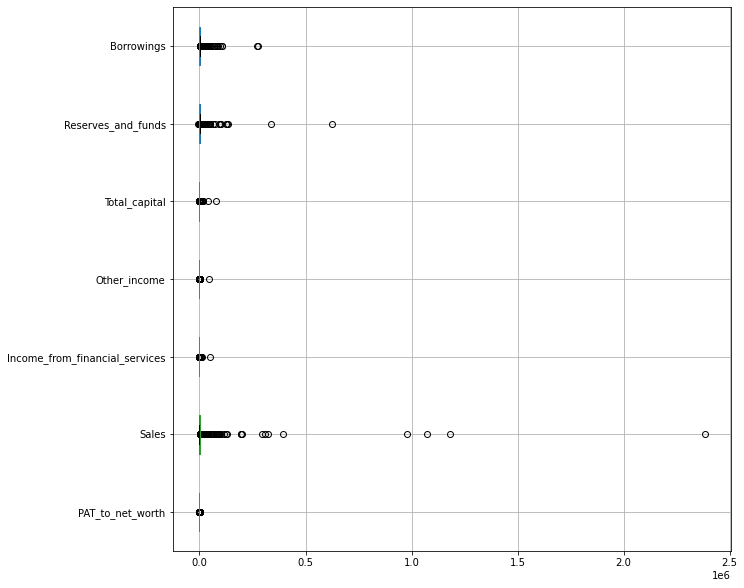

In [49]:
plt.figure(figsize=(10,10))
Default.iloc[:, 15:22].boxplot(vert=0)

<AxesSubplot:>

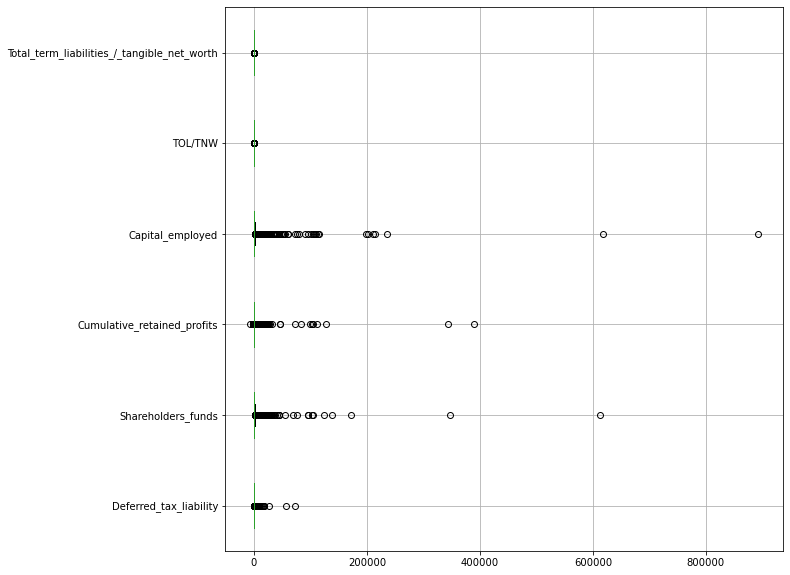

In [50]:
plt.figure(figsize=(10,10))
Default.iloc[:, 23:29].boxplot(vert=0)

<AxesSubplot:>

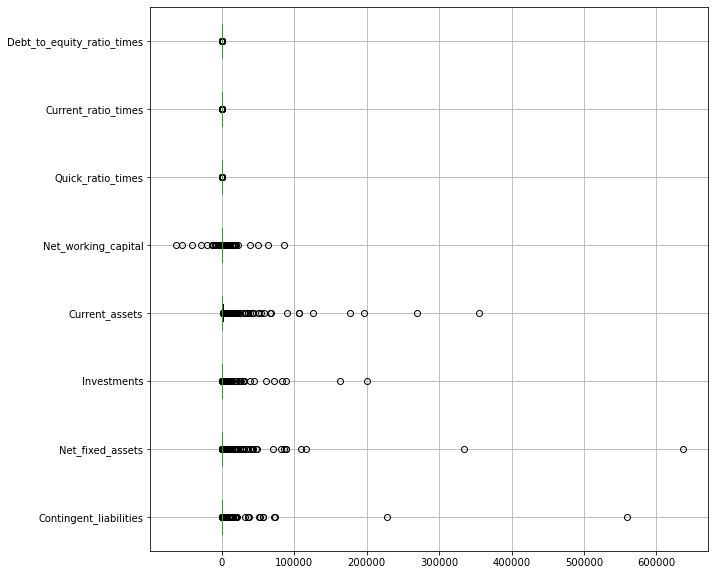

In [51]:
plt.figure(figsize=(10,10))
Default.iloc[:, 30:38].boxplot(vert=0)

<AxesSubplot:>

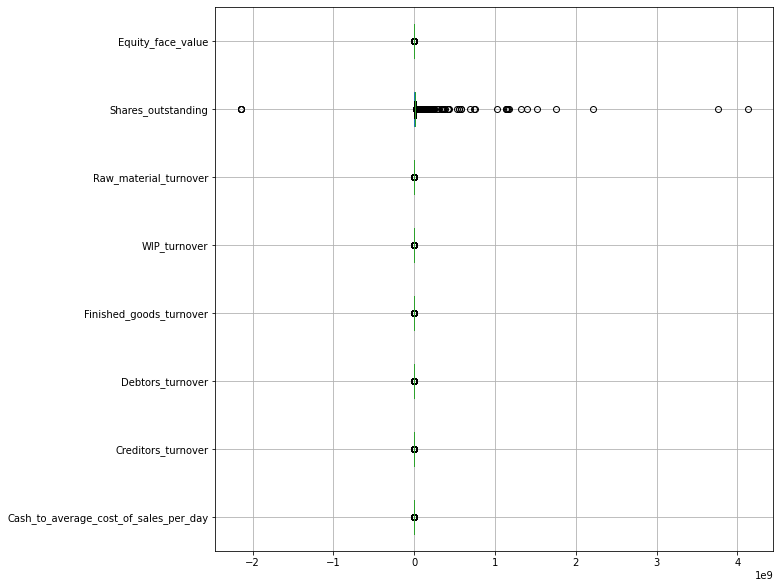

In [52]:
plt.figure(figsize=(10,10))
Default.iloc[:, 39:47].boxplot(vert=0)

<AxesSubplot:>

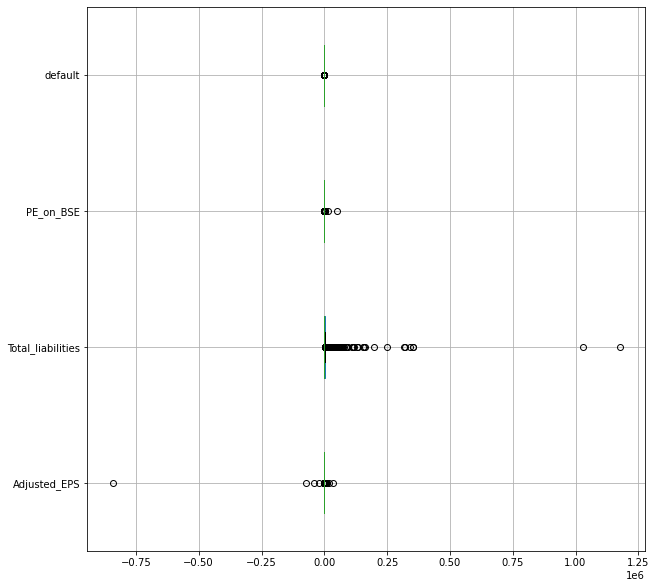

In [53]:
plt.figure(figsize=(10,10))
Default.iloc[:, 48:55].boxplot(vert=0)

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking the minumum and maximum wiskers of boxplot

In [54]:
def check_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [55]:
check_outlier(Default['Networth_Next_Year'])

(-604.9, 1092.7)

In [56]:
check_outlier(Default['Adjusted_EPS'])

(-11.22, 18.700000000000003)

In [57]:
check_outlier(Default['Shares_outstanding'])

(-6955350.0, 17485210.0)

In [58]:
check_outlier(Default['Total_liabilities'])

(-1419.8000000000002, 2609.8)

In [59]:
check_outlier(Default['Net_working_capital'])

(-124.89999999999999, 205.5)

In [60]:
check_outlier(Default['Cumulative_retained_profits'])

(-295.84999999999997, 496.54999999999995)

In [61]:
check_outlier(Default['Capital_employed'])

(-998.95, 1827.05)

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Correlation

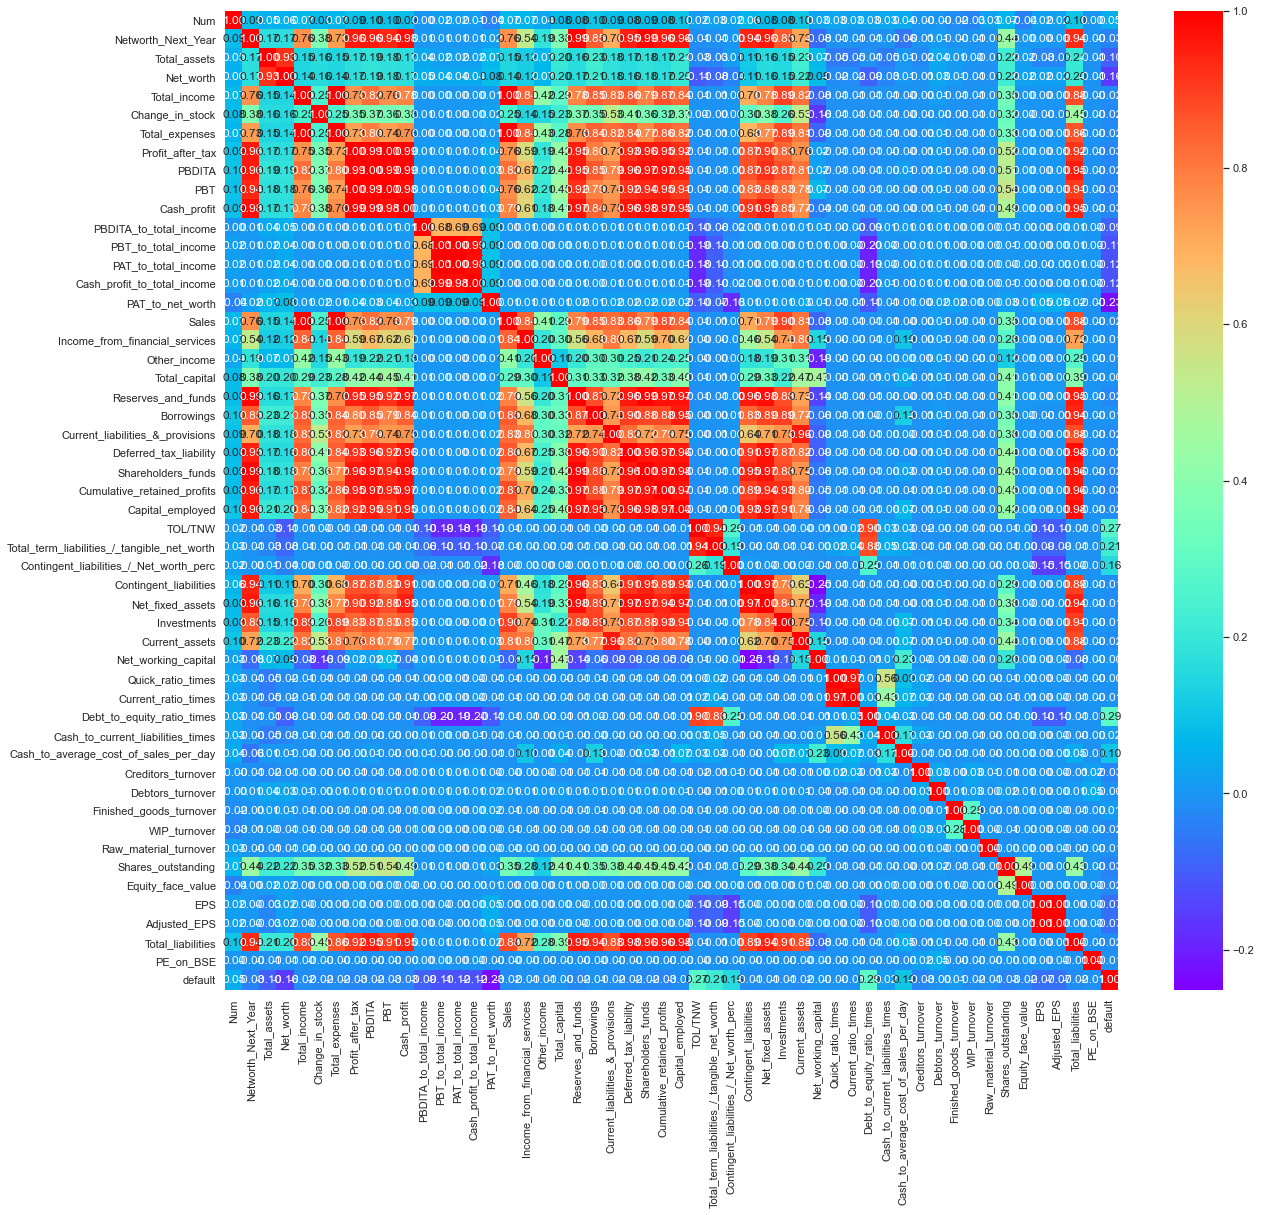

In [62]:
plt.figure(figsize=(20,18))
sns.set(font_scale=1)
sns.heatmap(Default.corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.show()

In [63]:
Default.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_to_total_income',
       'PBT_to_total_income', 'PAT_to_total_income',
       'Cash_profit_to_total_income', 'PAT_to_net_worth', 'Sales',
       'Income_from_financial_services', 'Other_income', 'Total_capital',
       'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions',
       'Deferred_tax_liability', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL/TNW',
       'Total_term_liabilities_/_tangible_net_worth',
       'Contingent_liabilities_/_Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Credit

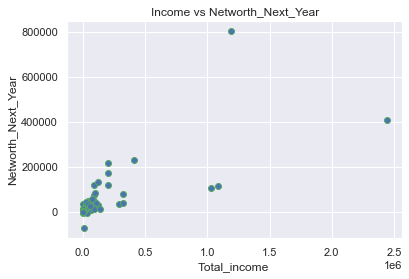

In [64]:
plt.scatter(Default['Total_income'], Default['Networth_Next_Year'], edgecolors='g')
plt.xlabel('Total_income ')
plt.ylabel('Networth_Next_Year')
plt.title('Income vs Networth_Next_Year')
plt.show()

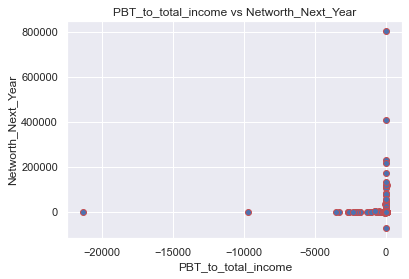

In [65]:
plt.scatter(Default['PBT_to_total_income'], Default['Networth_Next_Year'], edgecolors='r')
plt.xlabel('PBT_to_total_income')
plt.ylabel('Networth_Next_Year')
plt.title('PBT_to_total_income vs Networth_Next_Year')
plt.show()

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Model Building using Logistic Regression for 'Probability at default'with variable 'PBT_of_total_income

In [66]:
import statsmodels.formula.api as SM

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Creating logistic regression equation & storing it in f_1

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’ data = ‘Data Frame containing the required values’).fit()

In [67]:
f_1 = 'default ~ PBT_to_total_income'

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Fitting the logistic regression model

In [68]:
model_1 = SM.logit(formula = f_1, data=Default).fit()

Optimization terminated successfully.
         Current function value: 0.245922
         Iterations 7


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Studying whether this equation is significant or not

In [69]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3541
Model:                          Logit   Df Residuals:                     3539
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.01658
Time:                        23:02:36   Log-Likelihood:                -870.81
converged:                       True   LL-Null:                       -885.49
Covariance Type:            nonrobust   LLR p-value:                 6.025e-08
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.6414      0.068    -39.088      0.000      -2.774      -2.509
PBT_to_total_income    -0.0011      0.000     -4.541      0.000      -0.002      -0.001
=======================================================================================
"""

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking the coefficients

In [70]:
coefficients = model_1.params
coefficients

Intercept             -2.641352
PBT_to_total_income   -0.001121
dtype: float64

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Printing the confidence intervals of odds ratio

In [71]:
conf2 = model_1.conf_int()
print("odds ratio with confidence intervals")
print(np.exp(conf2))

odds ratio with confidence intervals
                            0         1
Intercept            0.062425  0.081357
PBT_to_total_income  0.998396  0.999363


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking distribution of fitted values

In [72]:
y_prob_pred_1 = model_1.predict()
np.percentile(y_prob_pred_1,[0,10,25,50,75,100])

array([0.05988995, 0.06542331, 0.0659256 , 0.06629392, 0.06648227,
       1.        ])

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Plot of Actual Default vs Predicted default

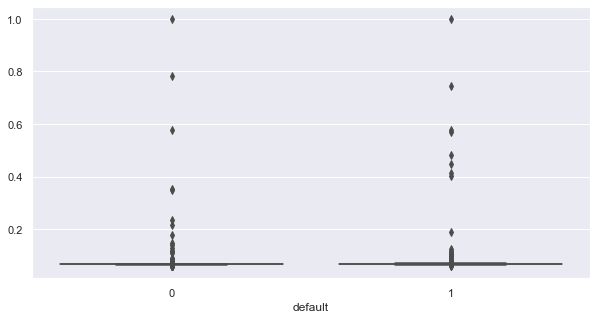

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(x=Default['default'],y=y_prob_pred_1)
plt.show()

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Adding 2nd variable 'Debt_to_equity_ratio_times' to the logistic regression model

In [74]:
f_2 = 'default ~ PBT_to_total_income + Debt_to_equity_ratio_times'

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Fitting logistic regression model

In [75]:
model_2 = SM.logit(formula = f_2, data=Default).fit()

Optimization terminated successfully.
         Current function value: 0.223492
         Iterations 7


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking the parameters

In [76]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3541
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                  0.1063
Time:                        23:02:36   Log-Likelihood:                -791.38
converged:                       True   LL-Null:                       -885.49
Covariance Type:            nonrobust   LLR p-value:                 1.355e-41
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.8997      0.076    -37.905      0.000      -3.050      -2.750
PBT_to_total_income           -0.0010      0.000     -3.886      0.000      -0.002      -0.000
Debt_to_equity_ratio_times     0.0667      0.009      7.765      0.000       0.050       0.084
==============================================================================================
"""

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking the coefficients

In [77]:
coefficients = model_2.params
coefficients

Intercept                    -2.899681
PBT_to_total_income          -0.001008
Debt_to_equity_ratio_times    0.066741
dtype: float64

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking the descriptive statistics of predicted probabilities

In [78]:
y_prob_pred_2 = model_2.predict()
np.percentile(y_prob_pred_2,[0,10,25,50,75,100])

array([0.04740377, 0.05184925, 0.05267007, 0.05473282, 0.05836263,
       1.        ])

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Plot of Actual Default vs Predicted default

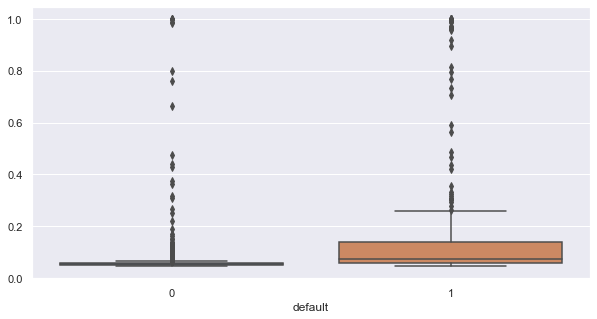

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(x=Default['default'],y=y_prob_pred_2)
plt.show()

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>predicted classes using cutoff 0.07

In [80]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_2)):
    if np.array(y_prob_pred_2)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

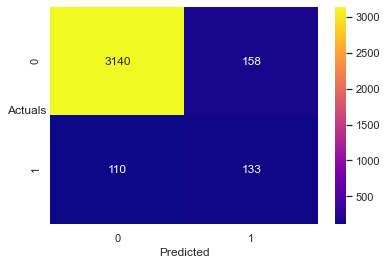

In [81]:
sns.heatmap((metrics.confusion_matrix(Default['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Confusion matrix terminologies:

Sensitivity aka Recall (true positives / all actual positives) = TP / TP + FN

Specificity (true negatives / all actual negatives) =TN / TN + FP

Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN

Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Calculating sensitivity of the model

In [82]:
133/(133+110)

0.5473251028806584

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Calculating specificity of the model

In [83]:
3140/(3140+158)

0.9520921770770163

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking model accuracy

In [84]:
(133+3140)/(133+110+3140+158)

0.9243151652075685

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Calculating misclassification rate

In [85]:
1-((133+3140)/(133+110+3140+158))

0.07568483479243149

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>predicted classes using cutoff 0.06

In [86]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_2)):
    if np.array(y_prob_pred_2)[i]>0.06:
        a=1
    else:
        a=0
    y_class_pred.append(a)

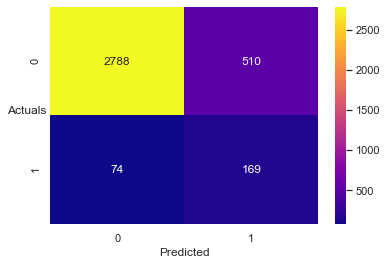

In [87]:
sns.heatmap((metrics.confusion_matrix(Default['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Calculating sensitivity of the model

In [88]:
169/(169+74)

0.6954732510288066

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Calculating specificity of the model

In [89]:
2788/(2788+510)

0.845360824742268

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking model accuracy

In [90]:
(169+2788)/(169+74+2788+510)

0.8350748376164925

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Calculating misclassification rate

In [91]:
1-((169+2788)/(169+74+2788+510))

0.16492516238350752

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>predicted classes using cutoff 0.08

In [92]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_2)):
    if np.array(y_prob_pred_2)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

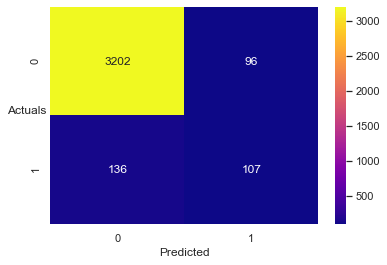

In [93]:
sns.heatmap((metrics.confusion_matrix(Default['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Calculating sensitivity of the model

In [94]:
107/(136+107)

0.4403292181069959

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Calculating specificity of the model

In [95]:
3202/(3202+96)

0.9708914493632504

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking model accuracy

In [96]:
(107+3202)/(107+136+3202+96)

0.9344817848065519

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Calculating misclassification rate

In [97]:
1-((107+3202)/(107+136+3202+96))

0.06551821519344814

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Comparing Altman's Z score with logistic regression model

In [98]:
Default['Altman_score']=1.2*(Default.Net_working_capital/Default.Total_assets)+1.4*(Default.Cumulative_retained_profits/Default.Total_assets)+3.3*(Default.PBDITA/Default.Total_assets)+0.6*(Default.Equity_face_value/Default.Total_assets)+0.999*(Default.Sales/Default.Total_assets)
Default['Altman_score']

0        17.991042
1         3.223439
2         2.650964
3       214.365519
4         4.297941
           ...    
3536      2.274196
3537      2.298526
3538      1.760144
3539      4.054600
3540    603.978167
Name: Altman_score, Length: 3541, dtype: float64

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Descriptive statistics of the altman score

In [99]:
Default['Altman_score'].describe()

count     3541.000000
mean         9.186016
std        667.317560
min     -28706.178110
25%          1.573883
50%          2.344135
75%          3.563892
max       6275.269000
Name: Altman_score, dtype: float64

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Decision tree & check its accuracy

In [100]:
from sklearn import tree 
import matplotlib.pyplot as plt

In [101]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [102]:
clf.fit(Default[['PBT_to_total_income','Debt_to_equity_ratio_times']], Default['default'])

DecisionTreeClassifier(criterion='entropy', max_depth=2)

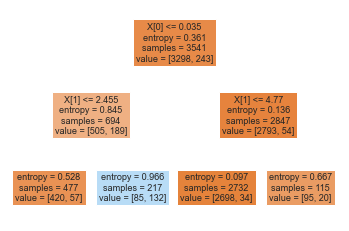

In [103]:
tree.plot_tree(clf.fit(Default[['PBT_to_total_income','Debt_to_equity_ratio_times']], Default['default']), filled=True) 
plt.show()

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Predicting on Actual dataset

In [104]:
y_predict = clf.predict(Default[['PBT_to_total_income','Debt_to_equity_ratio_times']])

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>confusion matrix

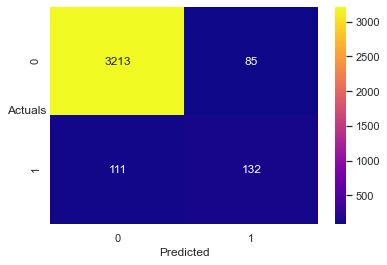

In [105]:
sns.heatmap((metrics.confusion_matrix(Default['default'],y_predict)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>sensitivity of the model

In [106]:
132/(132+111)

0.5432098765432098

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking specificity of the model

In [107]:
3213/(3213+85)

0.9742268041237113

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Checking model efficiency

In [108]:
(132+3213)/(132+3213+85+111)

0.9446484044055352

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>misclassification rate

In [109]:
1-((132+3213)/(132+3213+85+111))

0.055351595594464786

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Perform Train Test Split

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree

In [111]:
cat=[]
num=[]
for i in Default.columns:
    if Default[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

[]
['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_to_total_income', 'PBT_to_total_income', 'PAT_to_total_income', 'Cash_profit_to_total_income', 'PAT_to_net_worth', 'Sales', 'Income_from_financial_services', 'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions', 'Deferred_tax_liability', 'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed', 'TOL/TNW', 'Total_term_liabilities_/_tangible_net_worth', 'Contingent_liabilities_/_Net_worth_perc', 'Contingent_liabilities', 'Net_fixed_assets', 'Investments', 'Current_assets', 'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times', 'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times', 'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover', 'Debtors_turnover', 'Finished_goods_turnover', 'WIP_turnover', 'Raw_material_turnover'

In [112]:
Company=Default.copy()

In [113]:
X = Company.drop('default',axis=1)

# Copy target into the y dataframe.  
y = Company['default']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42)

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.9308600337268128
[[2200    3]
 [ 161    8]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2203
           1       0.73      0.05      0.09       169

    accuracy                           0.93      2372
   macro avg       0.83      0.52      0.53      2372
weighted avg       0.92      0.93      0.90      2372



In [117]:
LR_metrics=classification_report(y_train, y_predict,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_train_precision=round(df.loc["1"][1],2)
LR_train_recall=round(df.loc["1"][2],2)
LR_train_f1=round(df.loc["1"][0],2)
print ('LR_train_precision ',LR_train_precision)
print ('LR_train_recall ',LR_train_recall)
print ('LR_train_f1 ',LR_train_f1)

LR_train_precision  0.05
LR_train_recall  0.09
LR_train_f1  0.73


AUC: 0.615


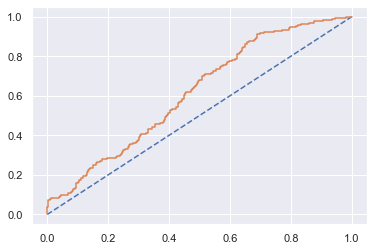

In [118]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [119]:
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.9366980325064157
[[1094    1]
 [  73    1]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1095
           1       0.50      0.01      0.03        74

    accuracy                           0.94      1169
   macro avg       0.72      0.51      0.50      1169
weighted avg       0.91      0.94      0.91      1169



In [120]:
LR_metrics=classification_report(y_test, y_predict,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_test_precision=round(df.loc["1"][1],2)
LR_test_recall=round(df.loc["1"][2],2)
LR_test_f1=round(df.loc["1"][0],2)
print ('LR_test_precision ',LR_test_precision)
print ('LR_test_recall ',LR_test_recall)
print ('LR_test_f1 ',LR_test_f1)

LR_test_precision  0.01
LR_test_recall  0.03
LR_test_f1  0.5


AUC: 0.549


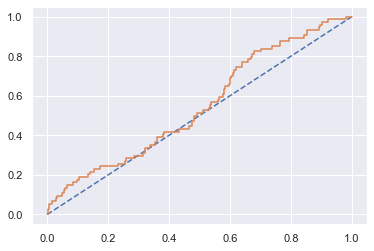

In [121]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[2203    0]
 [   0  169]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2203
           1       1.00      1.00      1.00       169

    accuracy                           1.00      2372
   macro avg       1.00      1.00      1.00      2372
weighted avg       1.00      1.00      1.00      2372



In [123]:
RF_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
RF_train_precision=round(df.loc["1"][1],2)
RF_train_recall=round(df.loc["1"][2],2)
RF_train_f1=round(df.loc["1"][0],2)
print ('RF_train_precision ',RF_train_precision)
print ('RF_train_recall ',RF_train_recall)
print ('RF_train_f1 ',RF_train_f1)

RF_train_precision  1.0
RF_train_recall  1.0
RF_train_f1  1.0


AUC: 1.000


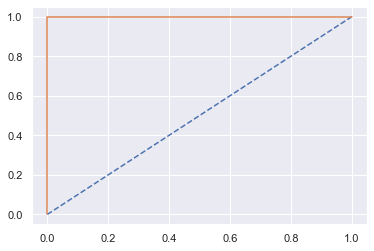

In [124]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [125]:
y_test_predict = RF_model.predict(X_test)
model_score =RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.998289136013687
[[1093    2]
 [   0   74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1095
           1       0.97      1.00      0.99        74

    accuracy                           1.00      1169
   macro avg       0.99      1.00      0.99      1169
weighted avg       1.00      1.00      1.00      1169



In [126]:
RF_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
RF_test_precision=round(df.loc["1"][1],2)
RF_test_recall=round(df.loc["1"][2],2)
RF_test_f1=round(df.loc["1"][0],2)
print ('RF_test_precision ',RF_test_precision)
print ('RF_test_recall ',RF_test_recall)
print ('RF_test_f1 ',RF_test_f1)

RF_test_precision  1.0
RF_test_recall  0.99
RF_test_f1  0.97


AUC: 1.000


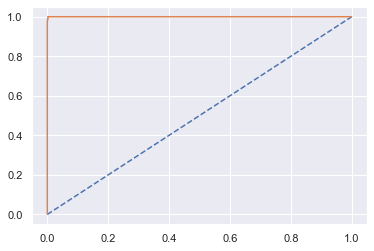

In [127]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Linear Discriminant Analysis

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9397133220910624
[[2187   16]
 [ 127   42]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2203
           1       0.72      0.25      0.37       169

    accuracy                           0.94      2372
   macro avg       0.83      0.62      0.67      2372
weighted avg       0.93      0.94      0.93      2372



In [129]:
LDA_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1"][1],2)
LDA_train_recall=round(df.loc["1"][2],2)
LDA_train_f1=round(df.loc["1"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.25
LDA_train_recall  0.37
LDA_train_f1  0.72


AUC: 0.893


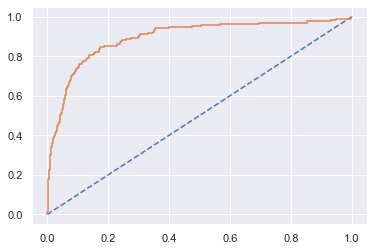

In [130]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [131]:
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9443969204448246
[[1083   12]
 [  53   21]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1095
           1       0.64      0.28      0.39        74

    accuracy                           0.94      1169
   macro avg       0.79      0.64      0.68      1169
weighted avg       0.93      0.94      0.93      1169



In [132]:
LDA_metrics = classification_report( y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][1],2)
LDA_test_recall=round(df.loc["1"][2],2)
LDA_test_f1=round(df.loc["1"][0],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.28
LDA_test_recall  0.39
LDA_test_f1  0.64


AUC: 0.884


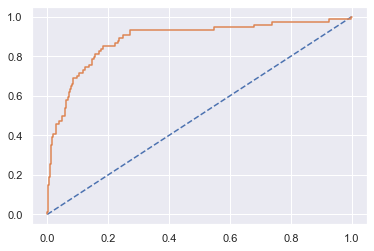

In [133]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Overall Analysis

In [134]:
index=['Recall','Precision','F1 Score']
data = pd.DataFrame({'Random Forest Train':[RF_train_recall,RF_train_precision,RF_train_f1],
        'Random Forest Test':[RF_test_recall,RF_test_precision,RF_test_f1],
       'Logistic Regression Train':[LR_train_recall,LR_train_precision,LR_train_f1],
        'Logistic Regression Test':[LR_test_recall,LR_test_precision,LR_test_f1],
        'LDA Train':[LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_recall,LDA_test_precision,LDA_test_f1],},index=index)
round(data,2)

,Random Forest Train,Random Forest Test,Logistic Regression Train,Logistic Regression Test,LDA Train,LDA Test
Recall,1.0,0.99,0.09,0.03,0.37,0.39
Precision,1.0,1.00,0.05,0.01,0.25,0.28
F1 Score,1.0,0.97,0.73,0.50,0.72,0.64
